In [ ]:
import warnings

warnings.filterwarnings('ignore')

# 2 基于ridge_map的山脊地图绘制

In [2]:
from ridge_map import RidgeMap
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 从本地的字体文件中注册字体
font_prop = fm.FontProperties(fname="fonts/UncialAntiqua-Regular.ttf")

# 基于传入的区域左下角、右上角经纬度
# 来获取原始高程数据并绘制成山脊地图
# 如果你有“特殊的上网技巧”，这一步等待时间会很短
(
    RidgeMap(bbox=(-156.250305,18.890695,-154.714966,20.275080),
             font=font_prop)
    .plot_map(label="Hawai'i")
)

plt.savefig('图3.png')

## 2.1 数据准备

In [3]:
# 初始化
rm = RidgeMap(bbox=(-156.250305,18.890695,-154.714966,20.275080),
              font=font_prop)

# 在线获取高程数据
values = rm.get_elevation_data(num_lines=200, viewpoint='north')

In [4]:
type(values)

numpy.ndarray

In [5]:
values.shape

(200, 300)

## 2.2 数据加工

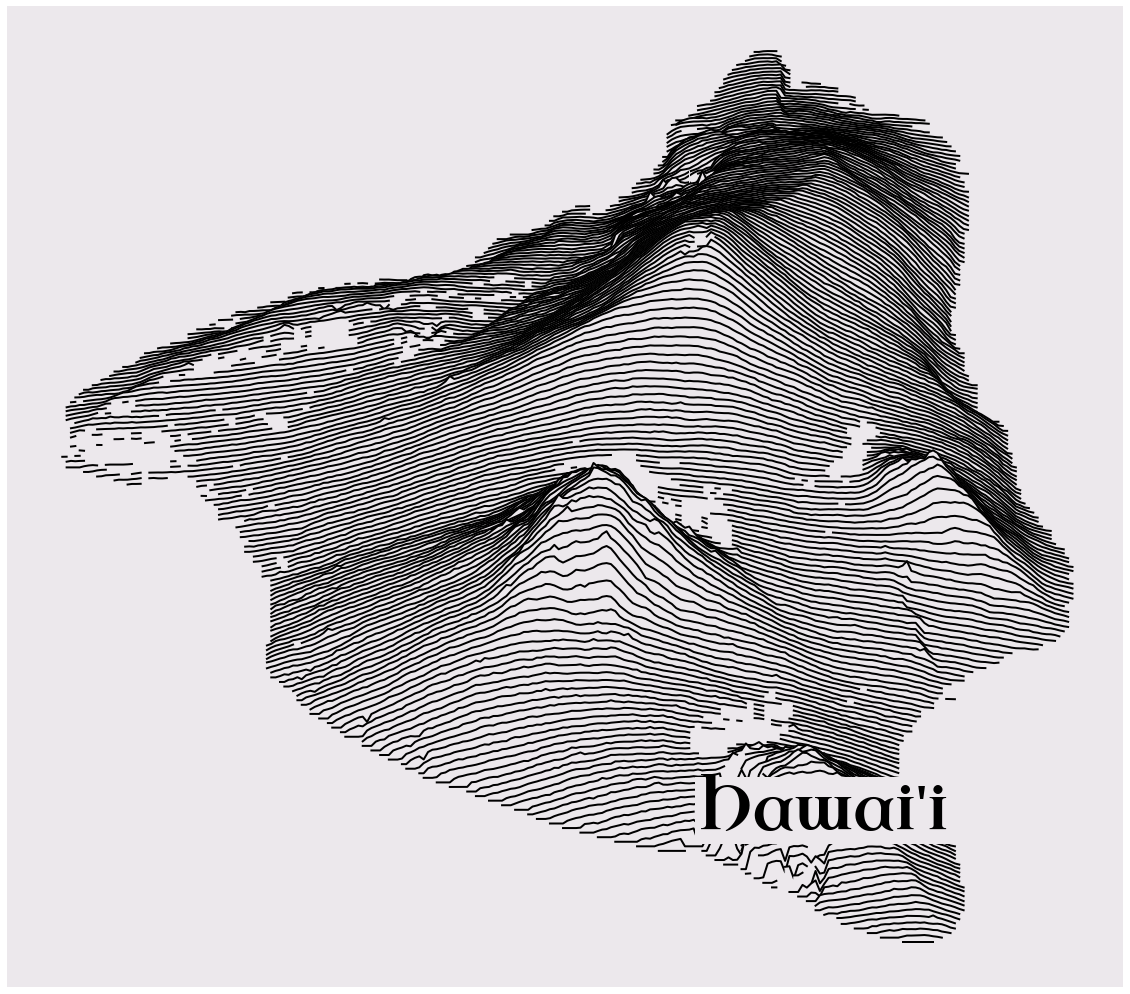

In [6]:
values = rm.preprocess(values=values,
                       water_ntile=10,
                       vertical_ratio=240)

rm.plot_map(values, label="Hawai'i")

plt.savefig('图6.png')

## 2.3 绘制图像

- **kind='gradient'**

In [7]:
rm.plot_map(values, label="Hawai'i", kind='gradient', line_color=plt.get_cmap('Reds'))

plt.savefig('图7.png')

- **kind='elevation'**

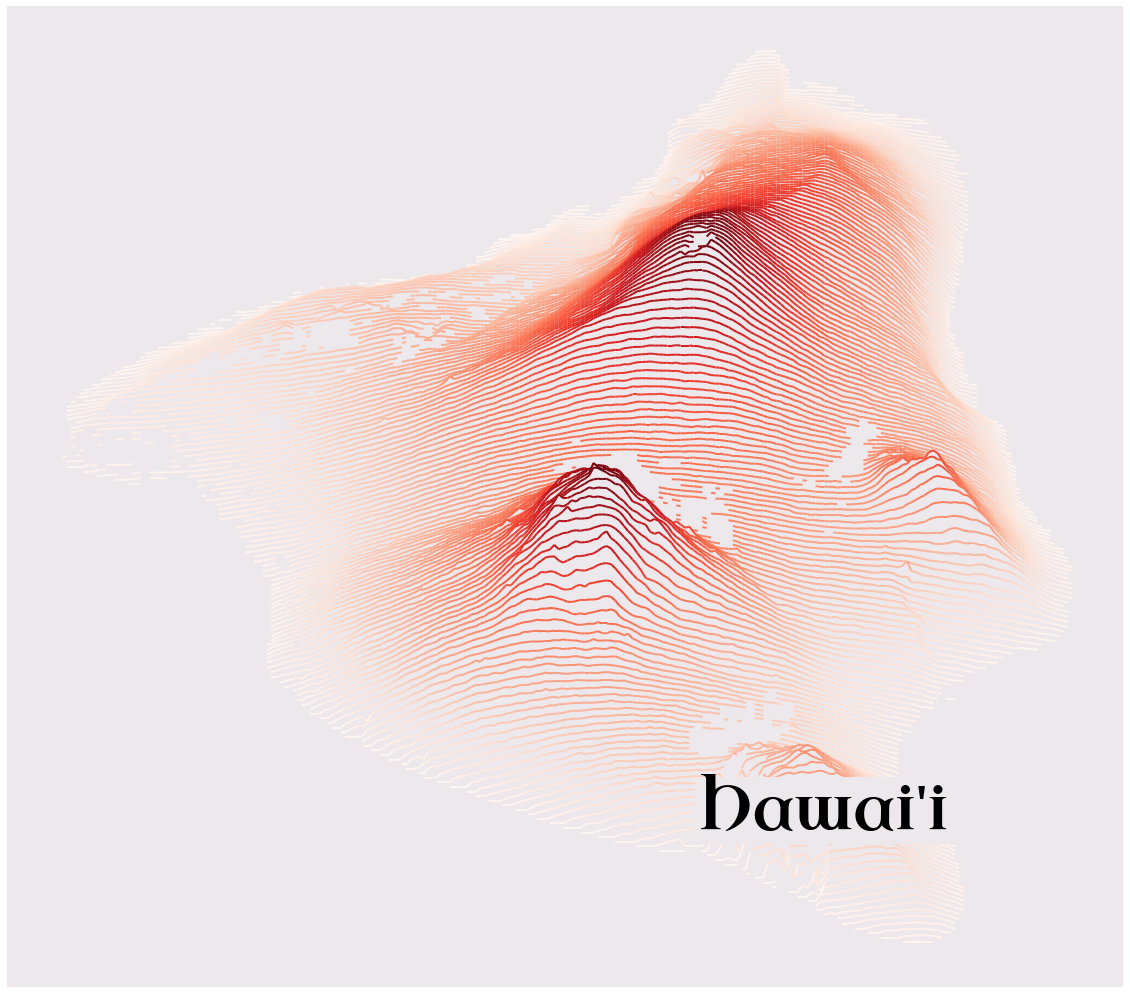

In [8]:
rm.plot_map(values, label="Hawai'i", kind='elevation', line_color=plt.get_cmap('Reds'))

plt.savefig('图8.png')

## 2.4 结合matplotlib

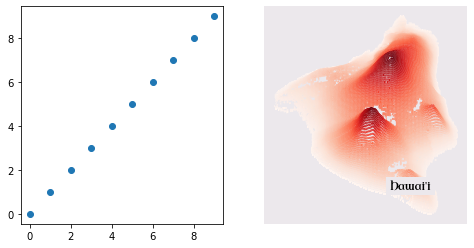

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

ax[0].scatter(range(10), range(10))

rm.plot_map(values, label="Hawai'i", 
            kind='elevation', 
            line_color=plt.get_cmap('Reds'),
            label_size=10,
            ax=ax[1]);

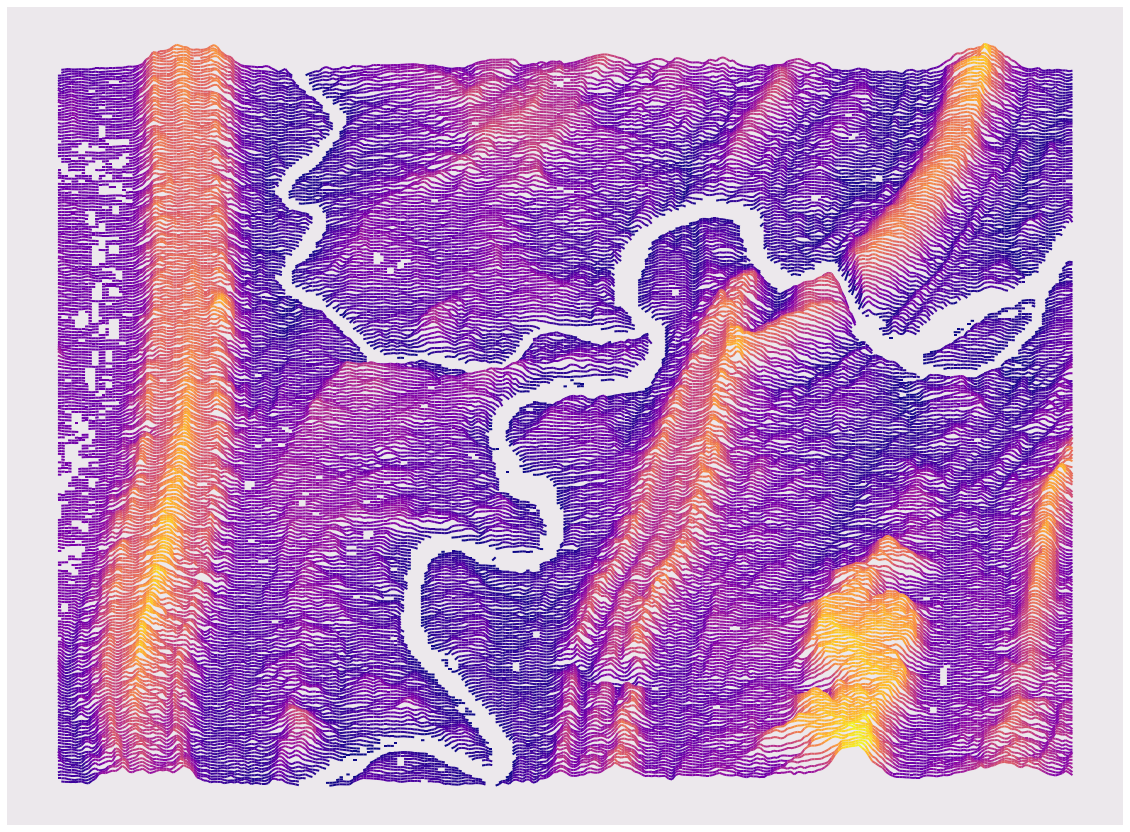

In [10]:
font_prop = fm.FontProperties(fname="fonts/LongCang-Regular.ttf")

rm = RidgeMap(bbox=(106.360758,29.385385,106.74734,29.676339),
              font=font_prop)

values = rm.get_elevation_data(num_lines=250, viewpoint='south')
values = rm.preprocess(values=values,
                       water_ntile=5,
                       vertical_ratio=90)

rm.plot_map(values, label="", 
            kind='elevation', 
            line_color=plt.get_cmap('plasma'),
            label_size=100)

plt.savefig('图10.png')